# Exercice: prix des maisons à Seattle

## Importations des librairies courantes

In [52]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

## Lecture du fichier

On dispose des statistiques de vente des maisons du district de Seattle 

<img src="https://sightline-wpengine.netdna-ssl.com/wp-content/uploads/2012/04/Sprawl_Walkability_CS06m_hi.jpg">

- id
- date: Date house was sold(String)
- price: Price of the sold house
- bedrooms: Numer of Bedrooms
- bathrooms: Numer of bathrooms
- sqft_living: Square footage of the living room
- sqrt_log: Square footage of the log
- floors: Total floors in the house
- waterfront: Whether the house has a view a waterfront(1: yes, 0: not)
- view: unknown
- condition: Condition of the house
- grade: unknown
- sqft_above: Square footage of house apart from basement
- sqft_basement: Square footage of the basement
- yr_built: Built year
- yr_renovated: Year when the house was renovated
- zipcode: zipcode of the house
- lat: Latitude coordinate
- long Longitude coordinate
- sqft_living15: Living room area in 2015(implies some renovations)
- sqrt_lot15: Lot area in 2015(implies some renovations)

In [53]:
#lecture du dataset
df = pd.read_csv("kc_house_data.csv", delimiter=",")

In [54]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0,1225000.0,257500.0,291850.0,229500.0,323000.0
bedrooms,3,3,2,4,3,4,3,3,3,3
bathrooms,1.0,2.25,1.0,3.0,2.0,4.5,2.25,1.5,1.0,2.5
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560
floors,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
waterfront,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot:xlabel='long', ylabel='lat'>

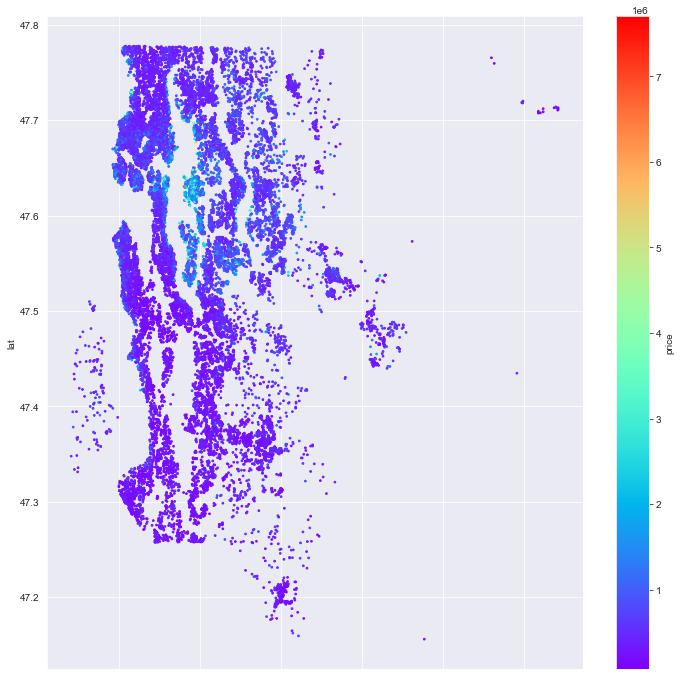

In [56]:
df.plot(kind="scatter", x="long", y="lat", c="price", cmap="rainbow", s=3, figsize=(12,12))

**Exercice** : visualiser les maisons par quartiers (zipcode) 

**Exercice** : visualiser les maisons de moins de 1 million de dollars par prix. On pourra aussi faire varier la taille du point en fonction de la surface de la propriété

**Exercice** : visualiser la densité des propriétés avec *jointplot*

**Exercice** : donner l'importance des caractéristiques

**Prédiction** Utiliser la regression linéaire pour prédire les prix

In [57]:
print(df['zipcode'].value_counts())

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64


<AxesSubplot:xlabel='zipcode', ylabel='price'>

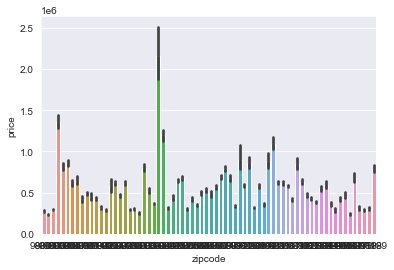

In [58]:
sns.barplot(x='zipcode', y='price', data=df)

On observe ici une forte disparité des prix des maisons en fonction des quartiers.

<AxesSubplot:xlabel='long', ylabel='lat'>

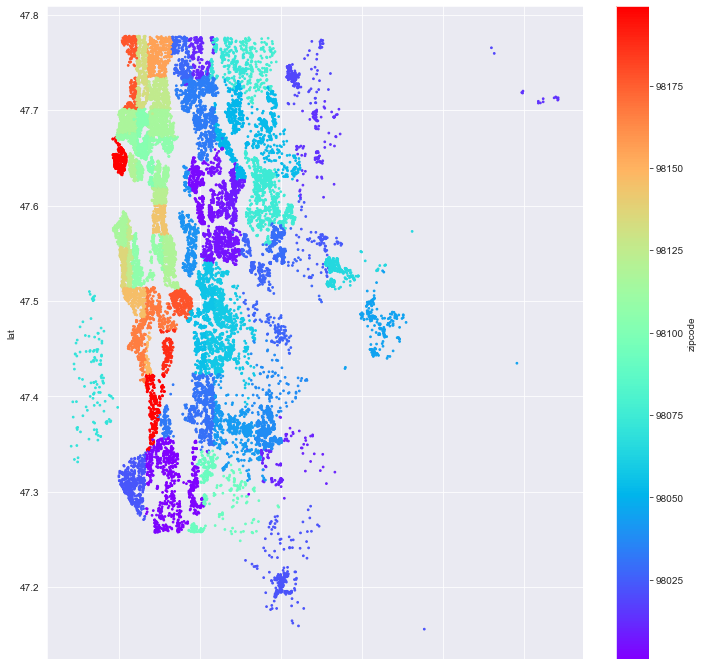

In [59]:
df.plot(kind="scatter", x="long", y="lat", c="zipcode", cmap="rainbow", s=3, figsize=(12,12))

In [60]:
cheaper = df.query("price < 1000000").copy()
cheaper.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:xlabel='long', ylabel='lat'>

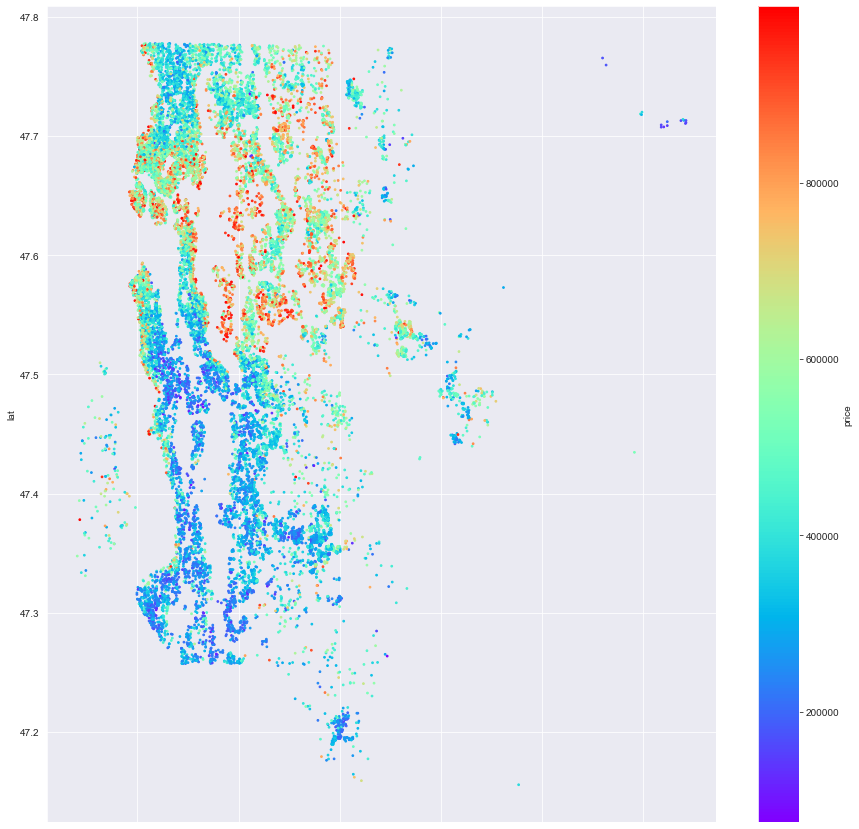

In [61]:
cheaper.plot(kind="scatter", x="long", y="lat", c="price", cmap="rainbow", s=3, figsize=(15,15))

Ici on ne prend pas en compte la taille de la demeure. En mettant directement notre paramètre de taille de maison en C, notre graphique ne ressemble plus à rien. Trouvons donc une manière de faire une bonne échelle.

In [62]:
cheaper['echelle'] = (cheaper['sqft_lot']/cheaper['sqft_lot'].mean())*4
cheaper.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,echelle
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1.557248
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1.996033
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2.756191
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1.378095
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2.227002


<AxesSubplot:xlabel='long', ylabel='lat'>

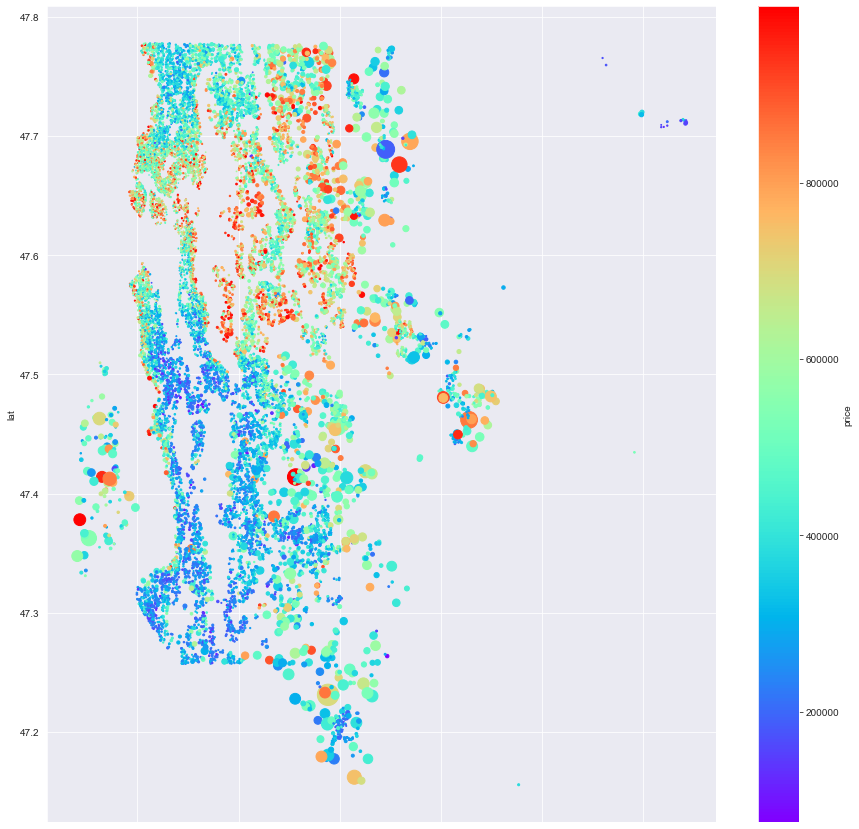

In [63]:
cheaper.plot(kind="scatter", x="long", y="lat", c="price", cmap="rainbow", s="echelle", figsize=(15,15))

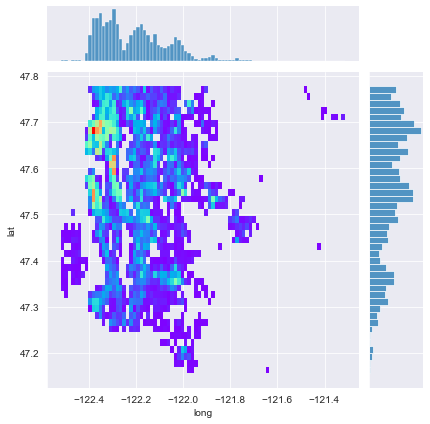

In [64]:
sns.jointplot(x="long", y="lat", kind="hist", data=df, cmap="rainbow")

Exercice : donner l’importance des caractéristiques

<AxesSubplot:>

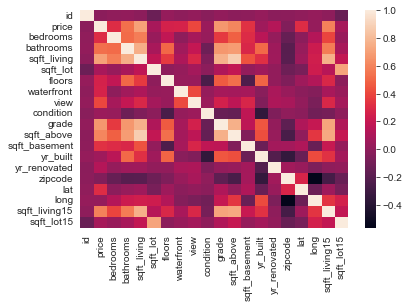

In [65]:
sns.heatmap(df.corr())

In [66]:
df_toheat = df[["price","bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "grade", "sqft_above", "sqft_living15"]]

<AxesSubplot:>

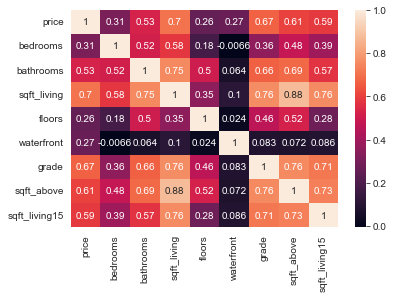

In [67]:
sns.heatmap(df_toheat.corr(), annot=True)

Prédiction Utiliser la regression linéaire pour prédire les prix

In [73]:
from sklearn.linear_model import LinearRegression

X = df[["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "grade", "sqft_above", "sqft_living15", "lat", "long"]]
Y = df['price']

#Séparation des données en entrainement et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 100)

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

# Evaluation du training set
Y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)

print("La performance du modèle sur la base d'apprentissage")
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Le score R2 est {}".format(r2))
print("\n")

# model evaluation for testing set
Y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("La performance du modèle sur la base de test")
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Le score R2 est {}".format(r2))
print("\n")

La performance du modèle sur la base d'apprentissage
L'erreur quadratique moyenne est 216168.7256743788
Le score R2 est 0.6532853873324074


La performance du modèle sur la base de test
L'erreur quadratique moyenne est 213101.76466789603
Le score R2 est 0.6630358068684434


